In [1]:

from matplotlib import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot

from PIL import Image
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
print (keras.__version__)

2.6.0


In [2]:
# Nous importons l'ensemble de données MNIST directement à partir de la bibliothèque Keras.


from keras.datasets import mnist



In [3]:
# Nous importons des données dans des variables et vérifions leur forme. 

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
# 60000 images de taille 28*28

x_train.shape


(60000, 28, 28)

In [5]:
# 60000 Etiquettes des images 

y_train.shape


(60000,)

In [6]:
# 10000 exemples d'imges de test tailles 28*28

x_test.shape


(10000, 28, 28)

In [7]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [8]:
# Vérifions les 10 premières étiquettes. 

y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Visualisation des données

<function matplotlib.pyplot.show(close=None, block=None)>

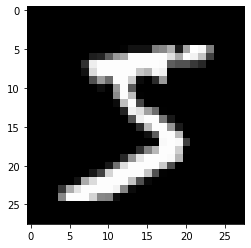

In [9]:
# Affichage en niveaux de gris

plt.imshow(x_train[0],cmap='gray')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

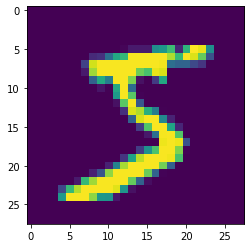

In [10]:
# Affichage en couleurs

plt.imshow(x_train[0])
plt.show


In [11]:
# Vérifions les 10 premières étiquettes. 

y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Nouveau jeu de données

In [12]:
# Comme vous pouvez le voir, ils contiennent des chiffres différents.
# Et nous ne nous intéressons qu'à deux d'entre eux.Les 1 et les 0 
# c'est-à-dire une division en deux ensembles.
# Nous nous occuperons des uns et des zéros
# nous créons de nouvelles variables qui ne contiennent que des zéros et des uns. 


x_train_new, y_train_new = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]



In [13]:
x_train_new.shape

(12665, 28, 28)

In [14]:
y_train_new.shape

(12665,)

In [15]:
# Vérifions les 10 premieres étiquettes 

y_train_new[0:10]



array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [16]:
# 

x_train_final = x_train_new.reshape(-1,784)
x_train_final.shape

# ci dessous nombre et dimension

(12665, 784)

In [17]:
# Pour l'ensemble de test nous créons aussi de nouvelles variables qui ne contiennent que des zéros et des uns.

x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]
x_test_new.shape

# ci dessous nombre et dimension

(2115, 28, 28)

In [18]:
# Normalisation des données

x_test_final = x_test_new.reshape(-1,784)


In [19]:
# Normalisation des données 

x_train_final = x_train_final / 255
x_test_final = x_test_final / 255


In [20]:

x_train_final


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

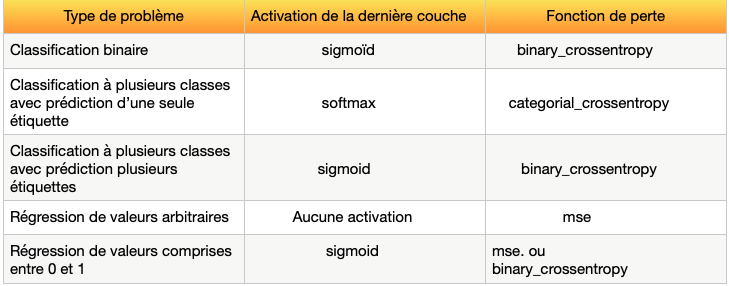

In [21]:
model = keras.Sequential(
  keras.layers.Dense(1, input_shape=(784,), activation='sigmoid')
)

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(1, activation='sigmoid'))

## Compilation du model

In [23]:
# Compilation du model

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics=['binary_accuracy'])

## Entrainement du model

In [24]:
model.fit(
  x=x_train_final,
  y=y_train_new,
  shuffle=True,
  epochs=10,
  batch_size=16
)

2022-12-17 16:36:39.036948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
792/792 [==============================] - 2s 1ms/step - loss: 0.3223 - binary_accuracy: 0.9325
Epoch 2/10
792/792 [==============================] - 1s 1ms/step - loss: 0.1237 - binary_accuracy: 0.9957
Epoch 3/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0758 - binary_accuracy: 0.9969
Epoch 4/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0546 - binary_accuracy: 0.9973
Epoch 5/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0429 - binary_accuracy: 0.9976
Epoch 6/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0356 - binary_accuracy: 0.9979
Epoch 7/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0305 - binary_accuracy: 0.9979
Epoch 8/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0268 - binary_accuracy: 0.9982
Epoch 9/10
792/792 [==============================] - 1s 2ms/step - loss: 0.0240 - binary_accuracy: 0.9983
Epoch 10/10
792/792 [================

## Evaluation

In [25]:
# 

eval = model.evaluate(x=x_test_final, y=y_test_new)


67/67 [==============================] - 0s 1ms/step - loss: 0.0181 - binary_accuracy: 0.9986


In [26]:
#

eval


[0.01810014434158802, 0.99858158826828]

In [27]:

model.save('un_zero_Keras.hdf5')


## Entrainement données de test

In [28]:
# Chargement des librairies

import numpy as np
from tensorflow import keras
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline



In [29]:
# On charge notre nouveau model :
# nous avons appris à notre model de reconnaitre que les zero et un

model = keras.models.load_model('un_zero_Keras.hdf5')


In [30]:
# On charge  le jeu de données de test
# On selectionne uniquement les zero et un
# attention notre model ne peut reconnaitre que les zero et un 

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]

x_test_final = x_test_new.reshape((-1, 784)) / 255

In [31]:
#

eval = model.evaluate(x=x_test_final, y=y_test_new)


67/67 [==============================] - 0s 1ms/step - loss: 0.0181 - binary_accuracy: 0.9986


In [32]:
# Evaluation données de test

eval


[0.01810014434158802, 0.99858158826828]

## Entrainement sur de nouvelles images

### Cette routine permet de normaliser l'image introduite, de la traité de 
### maniere à correspondre exactement au niveaux des pixels de notre modele.
### Sur notre image les pixels éclairées représentent le chiffre.( Apres traitement)
### Sinon c'est le contraire est donc incompatible avec notre model d entrainement

In [33]:
def convert_image(file):
  image = np.array(Image.open(file).convert('L'))
  return np.abs(((image / 255) - 1)*(-1))

In [34]:
# Avant d'introduire votre image ne pas oublier de la redimensionner en 28*28

## Chargement du chiffre zéro

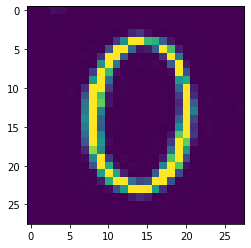

In [36]:
im = convert_image('zero.png')
imshow(im)

## Prédiction

On peut utiliser notre modele pour lui faire prédire notre chiffre:

In [37]:
# Prédiction sur notre image

predict_input = im.reshape((-1,784))
prediction = model.predict(predict_input)
prediction

# ci dessous résultat de la prédiction, une probabilité:

array([[0.03133848]], dtype=float32)

Nous obtenons un tableau de prédiction:
Un chiffre à virgule qui représente une probabilité.
## Si la probabilité est au dessus de 50% c'est un 1
## Si la probabilité est en dessous de 50% c'est un 0

In [38]:
prediction=(model.predict(predict_input)>0.5).astype(int)
prediction

# ci dessous résultat de la prédiction: le chiffre correspondant à l image

array([[0]])

## Chargement du chiffre Un

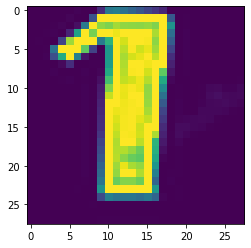

In [39]:
im = convert_image('unbis.png')
imshow(im)

In [40]:
predict_input = im.reshape((-1,784))
prediction = model.predict(predict_input)
prediction

# ci dessous résultat de la prédiction: une probabilité:

array([[0.99969035]], dtype=float32)

In [41]:
prediction=(model.predict(predict_input)>0.5).astype(int)
prediction

# ci dessous résultat de la prédiction: le chiffre correspondant à l image

array([[1]])